In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import timedelta
import seaborn as sns

In [2]:
plt.style.use("seaborn")

In [3]:
basepath = "./evaluation_results/AsiaSeoul_jinju_2004-08-10 01:00:00+09:00_dual_nocloud_p10/"

In [4]:
def load_one_policy(basepath, policy_name, load_s=False):
    path = os.path.join(basepath, policy_name)
    r_lst = np.load(os.path.join(path, "r_lst.npy"), allow_pickle=True)
    
    if load_s:
        s_lst = np.load(os.path.join(path, "s_lst.npy"), allow_pickle=True)
    else:
        s_lst = None
        
    t_lst = np.load(os.path.join(path, "t_lst.npy"), allow_pickle=True)
    t_lst += timedelta(hours=9)
    return pd.Series(r_lst, index=t_lst), s_lst

In [5]:
a_r, _ = load_one_policy(basepath, "agent")
o_r, _ = load_one_policy(basepath, "optimal")
s_r, _ = load_one_policy(basepath, "static")

Text(0.5, 1.0, 'simulation result in 2021-06-05')

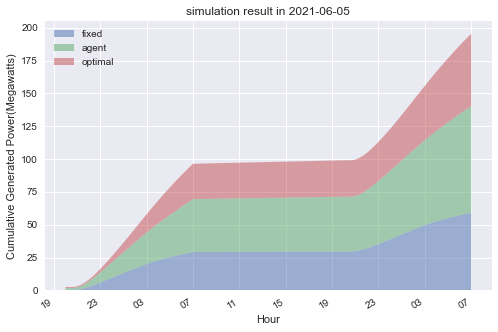

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)

df = pd.DataFrame({
    "agent" : a_r["2021-06-05":"2021-06-06"].cumsum(),
    "optimal" : o_r["2021-06-05":"2021-06-06"].cumsum(),
    "fixed" : s_r["2021-06-05":"2021-06-06"].cumsum()
})

ax.stackplot(a_r["2021-06-05":"2021-06-06"].index, [df["agent"], df["optimal"], df["fixed"]], alpha=0.5, labels=["fixed", "agent", "optimal"])
ax.set_ylabel("Cumulative Generated Power(Megawatts)")
ax.set_xlabel("Hour")

ax.xaxis.set_major_formatter(mdates.DateFormatter("%H"))

fig.autofmt_xdate()

ax.legend(loc=2)
ax.set_title("simulation result in 2021-06-05")

Text(0.5, 1.0, 'simulation result (2004-2025)')

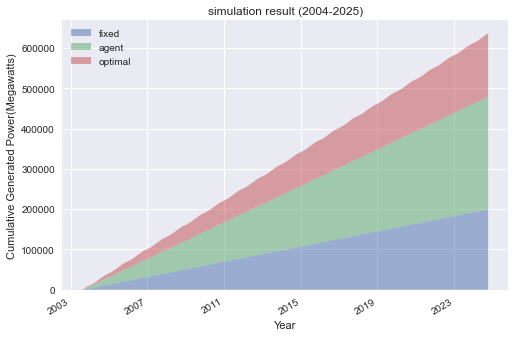

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)

df = pd.DataFrame({
    "agent" : a_r.cumsum(),
    "optimal" : o_r.cumsum(),
    "fixed" : s_r.cumsum()
})

ax.stackplot(a_r.index, [df["agent"], df["optimal"], df["fixed"]], alpha=0.5, labels=["fixed", "agent", "optimal"])
ax.set_ylabel("Cumulative Generated Power(Megawatts)")
ax.set_xlabel("Year")

ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

fig.autofmt_xdate()

ax.legend(loc=2)
ax.set_title("simulation result (2004-2025)")

Text(0.5, 1.0, 'simulation result in 2021')

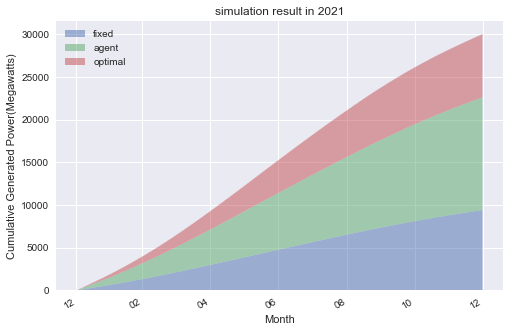

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)

df = pd.DataFrame({
    "agent" : a_r["2021-01-01":"2021-12-31"].cumsum(),
    "optimal" : o_r["2021-01-01":"2021-12-31"].cumsum(),
    "fixed" : s_r["2021-01-01":"2021-12-31"].cumsum()
})

ax.stackplot(a_r["2021-01-01":"2021-12-31"].index, [df["agent"], df["optimal"], df["fixed"]], alpha=0.5, labels=["fixed", "agent", "optimal"])
ax.set_ylabel("Cumulative Generated Power(Megawatts)")
ax.set_xlabel("Month")

ax.xaxis.set_major_formatter(mdates.DateFormatter("%m"))

fig.autofmt_xdate()

ax.legend(loc=2)
ax.set_title("simulation result in 2021")

Text(0, 0.5, 'Outperformance(%)')

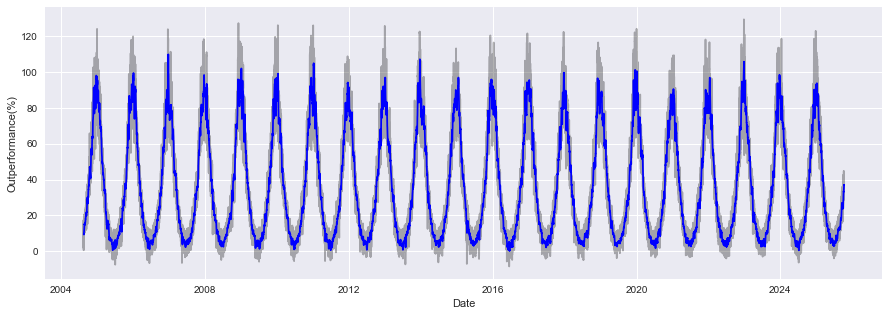

In [9]:
plt.figure(figsize=(15, 5))
outperformance = (pd.Series(a_r).rolling(3*24).mean() / pd.Series(s_r).rolling(3*24).mean() - 1) * 100
plt.plot(a_r.index, outperformance, alpha=0.3, color="black")
plt.plot(a_r.index, outperformance.rolling(200).mean(), color="blue")
plt.xlabel("Date")
plt.ylabel("Outperformance(%)")

In [10]:
month = [x.month for x in a_r.index]
outperformance_df = pd.DataFrame()
outperformance_df["Outperformance(%)"] = outperformance
outperformance_df["Month"] = month
outperformance_df.index = a_r.index


<AxesSubplot:xlabel='Month', ylabel='Outperformance(%)'>

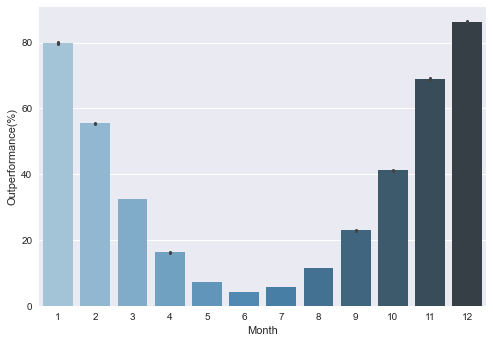

In [11]:
sns.barplot(
    data=outperformance_df,
    x="Month",
    y="Outperformance(%)",
    palette="Blues_d"
)

In [12]:
print(f"{(round(100*(a_r.mean() / s_r.mean() - 1), 4))} % improvement")

27.0745 % improvement


In [13]:
a_r, a_s = load_one_policy("./evaluation_results/AsiaSeoul_Jinju_2020-06-05 03:00:00+09:00_dual_nocloud_p20/", "static", True)

In [14]:
a_s = a_s.reshape(a_s.shape[0], 32, 32)[:1000]

In [15]:
from celluloid import Camera # getting the camera
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
import os

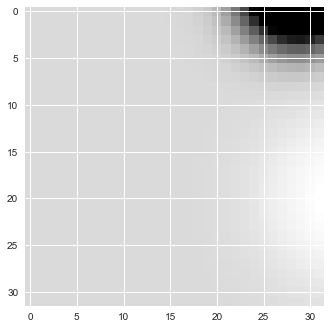

In [16]:
fig, ax = plt.subplots()
camera = Camera(fig)
for img_obj in a_s[:600]:
    ax.imshow(img_obj) # plotting
    camera.snap()

animation = camera.animate()
HTML(animation.to_html5_video())